<a href="https://colab.research.google.com/github/danielOva365/ProyectoIA_HeartfailurePrediction/blob/main/Predicci%C3%B3n_de_Heart_failures_Carolina%2C_Kateryne%2CDaniel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#Proyecto Final: PREDICCIÓN DE HEARTH FAILURES**

**Integrante: Daniel Ovalle, Kateryne Bonilla, Carolina Soto**

OBJETIVO: Emplear metodos de aprendiZaje supervisado para determinar a partir de un dataset que contiene información del estado de salud de las personas y demas datos como su edad, sexo, generó, etc. Si esta es posible que llegue a morir a causa de un ataque cardiaco.





In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn.decomposition import PCA, KernelPCA


datos = pd.read_csv('heart_failure_clinical_records_dataset.csv')
datos.head(15)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


Ahora llenaremos los datos faltantes, normalizamos los datos y aplicaremos PCA.

#**PREPROCESAMIENTO Y PCA**

In [ ]:
data_1=datos.copy()
np.random.seed(0)
centers = [[1, 1], [-1, -1], [1, -1]]

#ord_enc = preprocessing.LabelEncoder()
#encoded = lab_enc.fit_transform(trainingScores)


Xo=data_1.drop(["DEATH_EVENT",], axis=1)  #Caracteristicas
Yo=data_1['DEATH_EVENT']
Yi=pd.DataFrame(data_1['DEATH_EVENT'])           #Etiquetas
Xo.head(15)

#data_normalized=pd.DataFrame(scaler.transform(data_1),columns=data_1.columns)
# no vamos a dividir en test y training ya que solo quiero demostrar el uso de PCA en el conjunto
# se escalizan los datos.
scaler =StandardScaler()# Ejercicio, no use la escalización de los datos a ver que tal funciona, Cambia?
scaler.fit(Xo)
Xi = scaler.transform(Xo)
Xi=pd.DataFrame(scaler.transform(Xo),columns=Xo.columns)

pca = decomposition.PCA(n_components=12)
pca.fit(Xi)
Xn=pca.transform(Xi)
Xotrain, Xotest, yotrain, yotest = train_test_split(Xn, Yi, test_size=0.2, random_state=42) 


print(type(Xn))
print(type(Yi))


<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


#Regresión Logistica

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

from scipy.spatial import distance# por favor buscar la documentacion oficial de la función https://docs.scipy.org/doc/scipy/reference/spatial.distance.html#module-scipy.spatial.distance
from sklearn.preprocessing import StandardScaler# por favor buscar la documentacion oficial de la función
#https://scikit-learn.org/stable/modules/preprocessing.html
%matplotlib inline
#https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline
from sklearn.datasets import make_blobs
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html
from sklearn.datasets import make_circles

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
#Entrenamiento
LR = LogisticRegression(penalty='l2',solver='lbfgs',max_iter=1000, C=1.0,random_state=None).fit(Xotrain, yotrain)
Predicciones= LR.predict(Xotrain)
Predicciones1= LR.predict(Xotest)
print(Predicciones)
print("El score obtenido de la regresión logistica es de:",LR.score(Xotrain,yotrain),"\n")  #Predicciones del conjunto de entrenamiento
print(Predicciones1)
print("El score obtenido de la regresión logistica es de:",LR.score(Xotest,yotest),"\n\n")  #Predicciones del conjunto de prueba elejido del archivo train



[1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0
 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
El score obtenido de la regresión logistica es de: 0.8702928870292888 

[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1]
El score obtenido de la regresión logistica es de: 0.8 




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**KNN**

In [ ]:
import numpy as np
import pandas as pd
import numpy.matlib
import time
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import svm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range=range(1,30)
scores={}
scores_list=[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(Xotrain,yotrain)
  y_pred=knn.predict(Xotest)
  scores[k]=metrics.accuracy_score(yotest,y_pred)
  scores_list.append(metrics.accuracy_score(yotest,y_pred))

  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was

In [ ]:
!pip install matplotlib-venn

Text(0, 0.5, 'Testing Accuracy')

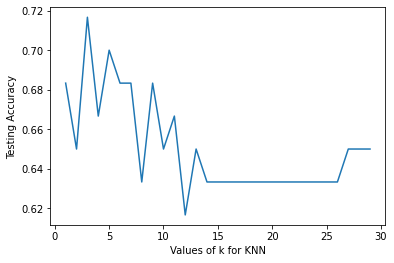

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel('Values of k for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
n_neighbors = 3
knn=KNeighborsClassifier(n_neighbors)
knn.fit(Xotrain,yotrain)
print('Accuracy of K-NN Classifier on the training set:{:.2f}'.format(knn.score(
Xotrain, yotrain)))
print('Accuracy of K-NN Classifier on the test set:{:.2f}'.format(knn.score(
Xotest, yotest)))   

Accuracy of K-NN Classifier on the training set:0.82
Accuracy of K-NN Classifier on the test set:0.72


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


**SVM**

In [ ]:
from sklearn import svm
from sklearn.metrics import matthews_corrcoef

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

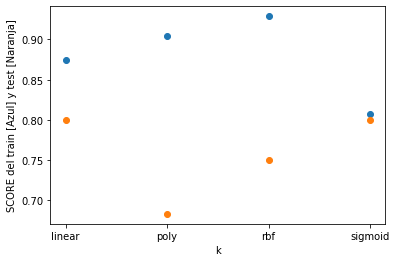

In [ ]:
#VARIACIÓN DE LOS KERNELS DE SVM
kernels =['linear', 'poly', 'rbf', 'sigmoid']  #Observaremos el mejor SCORE segun el kernel establecido
scores = []
scorestrain= []

for i in kernels:
    msv = svm.SVC(kernel = i)
    msv.fit(Xotrain, yotrain)
    #knn = KNeighborsClassifier(n_neighbors=7,weights=i ,metric=distance, metric_params=None,algorithm='brute')
    #knn.fit(Xtrain, ytrain)
    scores.append(msv.score(Xotest, yotest))
    scorestrain.append(msv.score(Xotrain, yotrain))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('SCORE del train [Azul] y test [Naranja]')
plt.scatter(kernels, scorestrain)
plt.scatter(kernels, scores)



In [ ]:
msv = svm.SVC(kernel='poly')
msv.fit(Xotrain, yotrain)


print('Score de SVM en los datos de train de entrenamiento set: {:.2f}'
    .format(msv.score(Xotrain, yotrain)))
print('Accuracy de SVM en los datos de train de prueba: {:.2f}'
    .format(msv.score(Xotest, yotest)), "\n")

#Predisvmtest= msv.predict(X_Realtest)
#print("Las predicciones obtenidas del archivo de test con SVM son las siguientes: \n", Predisvmtest,"\n")

Score de SVM en los datos de train de entrenamiento set: 0.90
Accuracy de SVM en los datos de train de prueba: 0.68 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gausiana

In [ ]:
# Training
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(Xotrain, yotrain)

# Prediccion de resultados
y_pred = classifier.predict(Xotest)
y_pred1 = classifier.predict(Xotrain)
# Matriz de confusion
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(yotest,y_pred)
act = accuracy_score(yotrain, y_pred1)
cm = confusion_matrix(yotest, y_pred)
print(ac)
print(act)

0.7
0.8368200836820083


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
dtc_1 = DecisionTreeClassifier()
dtc_1 = dtc_1.fit(Xotrain, yotrain)
prediction_dtc_1 = dtc_1.predict(Xotest)

[[27  8]
 [16  9]]


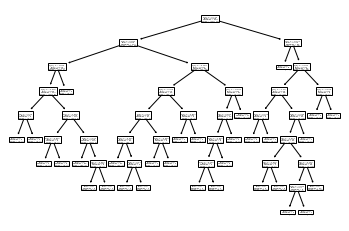

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(yotest, prediction_dtc_1))
tree.plot_tree(dtc_1);

In [ ]:
import graphviz 

dot_data = tree.export_graphviz(dtc_1, out_file=None,feature_names=Xo.columns,  
                     filled=True, rounded=True,  
                     special_characters=True) 

graph = graphviz.Source(dot_data) 


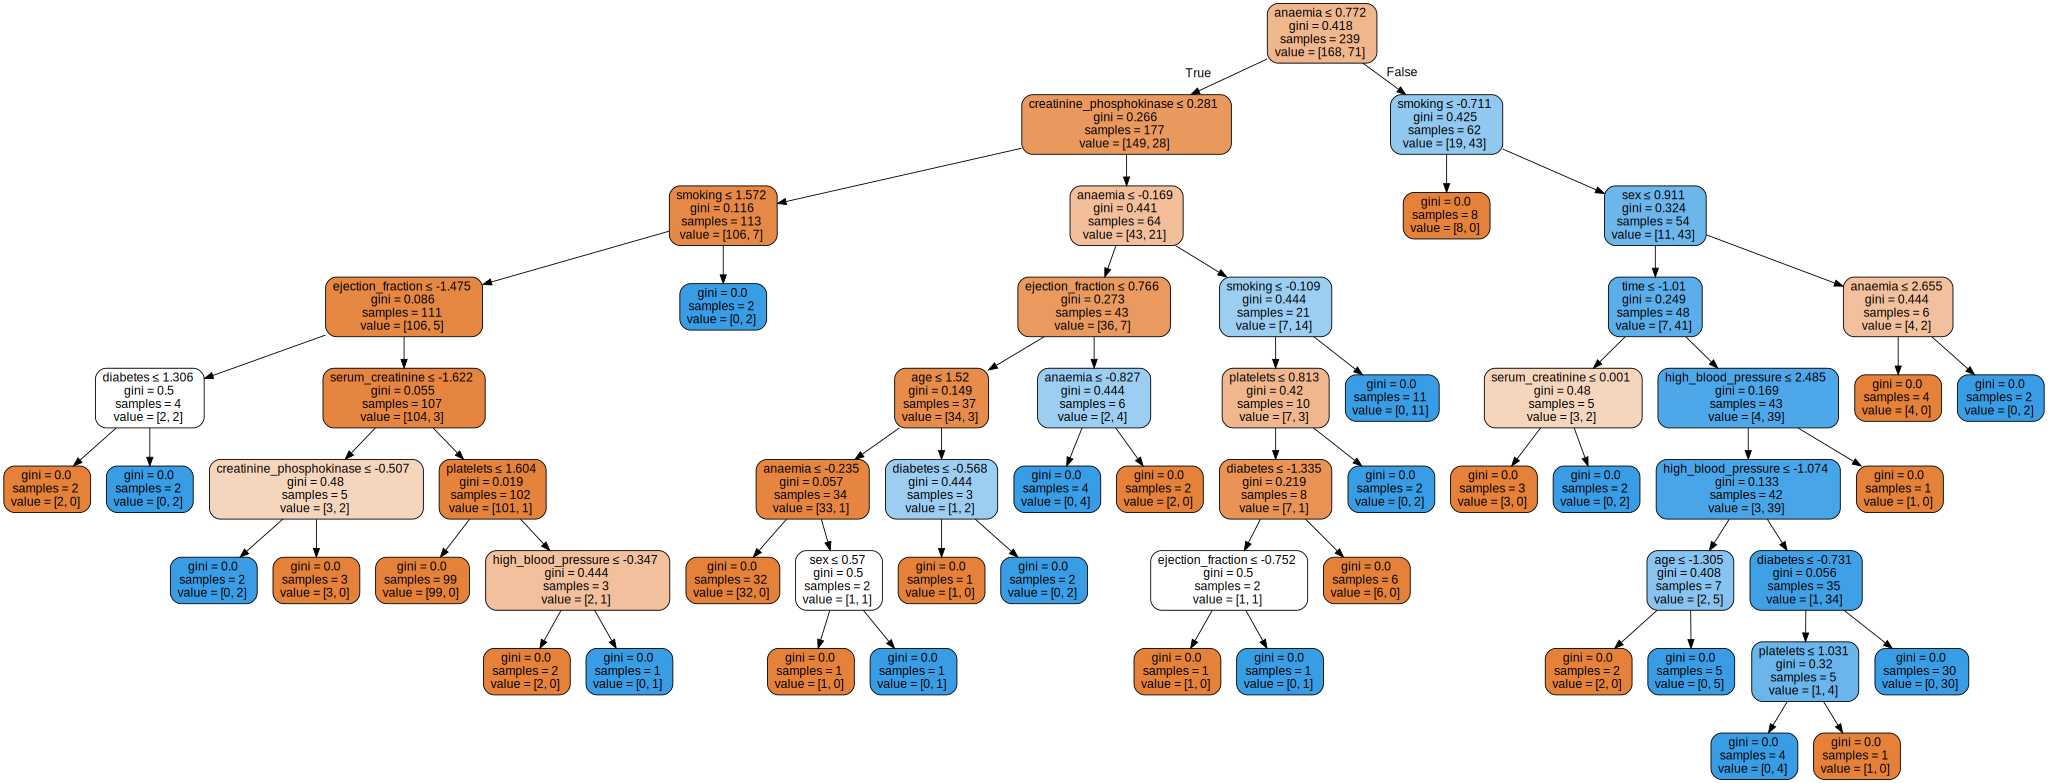

In [ ]:
graph

#**ANN**

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from keras.models import Sequential

from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(21, input_dim=Xotrain.shape[1] , activation='relu'))
nn_model.add(Dense(12,activation='relu'))
nn_model.add(Dense(1,activation='sigmoid'))

nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(Xotrain, yotrain, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)


Epoch 1/100
239/239 [==============================] - 1s 1ms/step - loss: 0.2497
Epoch 2/100
239/239 [==============================] - 0s 1ms/step - loss: 0.1997
Epoch 3/100
239/239 [==============================] - 0s 1ms/step - loss: 0.1723
Epoch 4/100
239/239 [==============================] - 0s 1ms/step - loss: 0.1531
Epoch 5/100
239/239 [==============================] - 0s 1ms/step - loss: 0.1413
Epoch 6/100
239/239 [==============================] - 0s 1ms/step - loss: 0.1329
Epoch 7/100
239/239 [==============================] - 0s 1ms/step - loss: 0.1274
Epoch 8/100
239/239 [==============================] - 0s 1ms/step - loss: 0.1230
Epoch 9/100
239/239 [==============================] - 0s 1ms/step - loss: 0.1191
Epoch 10/100
239/239 [==============================] - 0s 1ms/step - loss: 0.1155
Epoch 11/100
239/239 [==============================] - 0s 1ms/step - loss: 0.1126
Epoch 12/100
239/239 [==============================] - 0s 1ms/step - loss: 0.1096
Epoch 13/100


In [ ]:
nn_model.evaluate(Xotest, yotest)
y_pred_test_nn  = nn_model.predict(Xotest)

nn_pred = []
for i in y_pred_test_nn:
  if i > 0.5:
    nn_pred.append(1)
  else:
    nn_pred.append(0)

#predicciones= pd.DataFrame(nn_pred)
yotest = yotest.to_numpy()
print("Las predicciones realizadas son las siguientes:\n",np.transpose(nn_pred))
print("Las etiquetas contra las que compararemos\n",np.transpose(yotest))



2/2 [==============================] - 0s 10ms/step - loss: 0.2055
Las predicciones realizadas son las siguientes:
 [0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
Las etiquetas contra las que compararemos
 [[0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1
  1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1]]


In [ ]:
from sklearn.metrics import classification_report as cr
print(cr(yotest, nn_pred))

              precision    recall  f1-score   support

           0       0.75      0.94      0.84        35
           1       0.88      0.56      0.68        25

    accuracy                           0.78        60
   macro avg       0.81      0.75      0.76        60
weighted avg       0.80      0.78      0.77        60

